In [24]:
import pickle
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates
import h5py
from datetime import datetime, date, timedelta

In [25]:

file = '/Volumes/2023/20230609-20230625KeeLung/wav/PAM*/'


In [26]:
for i, path in enumerate(sorted(glob.glob(f'{file}/*23061*.mat'))[59:83]):
    print(path)
    #======= read array 
    arrays = {}
    f = h5py.File(path)
    for k, v in f.items():
        key = k
        arrays[key] = np.array(v)
        
    #======= clean array 
    df_array = arrays[key]
    ra, ca = df_array.shape
    
    time = df_array[0, 1:ca]
    freq = df_array[1:ra, 0]
    df_array = df_array[1:ra, 1:ca]
    
    #============================
    freq_downsample = []
    for f in range(0, ra-1 , 2):
        freq_downsample.append(freq[f])
        temp_row = df_array[f, :]  
        
        templist_95 = []; templist_50 = []; templist_25 = []
        for s in range(0, ca-1, 60):
            temp_col = temp_row[s : s + 60]
            pct_95 = np.percentile(temp_col, 95, interpolation='midpoint')
            pct_50 = np.percentile(temp_col, 50, interpolation='midpoint')
            pct_25 = np.percentile(temp_col, 25, interpolation='midpoint')
            templist_95.append(pct_95)
            templist_50.append(pct_50)
            templist_25.append(pct_25)
        if f == 0 :
            newarray95 = np.array(templist_95)
            newarray50 = np.array(templist_50)
            newarray25 = np.array(templist_25)
        else:
            newarray95 = np.vstack((newarray95, np.array(templist_95)))
            newarray50 = np.vstack((newarray50, np.array(templist_50)))
            newarray25 = np.vstack((newarray25, np.array(templist_25)))
    if i == 0 :
        total_array95 = newarray95
        total_array50 = newarray50
        total_array25 = newarray25
    else:
        total_array95 = np.hstack((total_array50, newarray95))
        total_array50 = np.hstack((total_array50, newarray50))
        total_array25 = np.hstack((total_array50, newarray25))
    print(total_array50.shape)

/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612110001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 60)
/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612120001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 120)
/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612130001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 180)
/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612140001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 240)
/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612150001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 300)
/Volumes/2023/20230609-20230625KeeLung/wav/PAMGuide_Batch_PSD_Abs_192000ptHannWindow_50pcOlap/7080.230612160001_PSD_2sHannWindow_50PercentOverlap.mat
(48000, 360)
/Volumes/2023/20230609-

**************************************************


Text(0.5, 1.0, 'Taoyuan_fish_chorus')

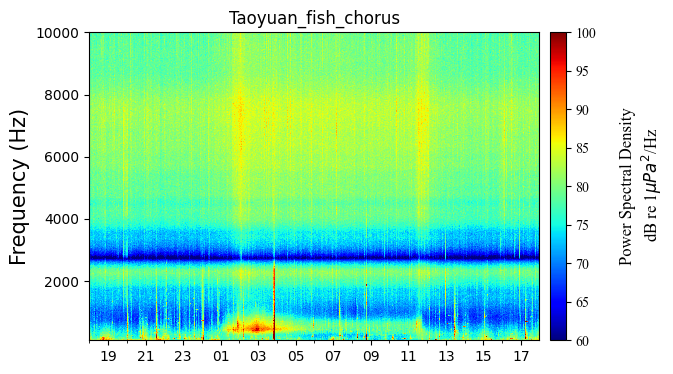

In [27]:
fig, ax = plt.subplots(1, figsize=(7, 4))
plt.rcParams["font.family"] = "Times New Roman"

vmin = 60
vmax = 100
cmap = cm.jet

freqmin = 100
freqmax = 10000

plot_array = total_array50[freqmin:freqmax,:]
row, col = plot_array.shape
base = datetime(2023, 6, 19, 18, 0, 0)
alldate = [base + timedelta(minutes = 1*x) for x in range(col)]
print('*'*50)


#========================================================


ax2 = ax.pcolormesh(alldate, np.array(freq_downsample)[freqmin:freqmax], plot_array, cmap=cmap, vmin=vmin, vmax=vmax) 
ax.set_ylabel('Frequency (Hz)', fontsize=15)
ax.set_ylim(freqmin, freqmax)
# ax.set_yscale('log')


# cax = fig.add_axes([ax[1].get_position().x1+0.015, ax[1].get_position().y0, 0.01, ax[0].get_position().y0+0.25])
cbar = fig.colorbar(ax2, ax=ax, pad=0.02)
# cbar = plt.colorbar(ax1)
# cbar.ax.set_yticklabels()

cbar.set_label('\nPower Spectral Density\n dB re 1'r'$\mu Pa^2$/Hz', fontsize=12)
cbar.set_ticks(range(vmin,vmax+1,5))


ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))     #optional formatting 
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))   #to get a tick every 15 minutes


title = 'Taoyuan_fish_chorus'
plt.title(title)
# plt.savefig(f'../Results/{title}.png', dpi = 150)
# plt.suptitle('Keelung_202306', fontsize=12)
# plt.savefig('../Results/Keelung_202306_all.png',dpi=500)
# plt.suptitle('Taoyuan_202306', fontsize=12)
# plt.savefig('../Results/Taoyuan_202306_all.png',dpi=500)

# arr = {'time': alldate, 
#        'freq': np.array(freq_downsample),
#       '95pct': total_array}

# import pickle
# pickle.dump( arr, open( f'../DataBase/PAM_pickle/{title}.pkl', 'wb' ) )